# BlaBlaCar Case Study

## General Overview of the datasets

In [27]:
import pandas as pd
import numpy as np
from numpy import median
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import dates

### Importing libraries

In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Openning the dataframes:

##### Description
- We have 3 datasets including 'api', 'attribution', and 'ad_types' as the reference table explaining the campaign names.
- In general we have 11 campaigns in a timeframe of 1 year (from July 2022 to June 2023)
- Out of 11 campaigns, 9 were running through the whole year, one that was running for two months but was repeated the follwing year, so in total 4 months, and one that was running only for two months.

##### Data Integrity Check
- Within the datasets we have, we have some zero values in attribution dataset; which belongs to the two campains that were exceptional. 
- Withing the reference table (ads_type) we have one duplicate and as duplicate values have no added value I drop it while openning.


In [293]:
api = pd.read_csv("api.csv")
api.sort_values(by = 'campaign_id').tail(30)

,campaign_id,campaign,month,cost,platform_clicks,impressions
116,839921,fr_yt_acq_drvr,2023-02-01,0.00,0.0,0.0
117,839921,fr_yt_acq_drvr,2023-03-01,0.00,0.0,0.0
118,839921,fr_yt_acq_drvr,2023-04-01,0.00,0.0,0.0
109,839921,fr_yt_acq_drvr,2022-07-01,55234.22,78302.0,9210281.0
115,839921,fr_yt_acq_drvr,2023-01-01,0.00,0.0,0.0
108,839921,fr_yt_acq_drvr,2022-06-01,25670.86,34222.0,5398522.0
60,886143,fr_gd_acq_drvr,2022-06-01,29666.00,459022.0,6454319.0
71,886143,fr_gd_acq_drvr,2023-05-01,36370.00,562752.0,7912883.0
61,886143,fr_gd_acq_drvr,2022-07-01,43971.00,680363.0,9566604.0
62,886143,fr_gd_acq_drvr,2022-08-01,38733.00,599315.0,8426992.0


In [292]:
attribution = pd.read_csv("attribution.csv")
attribution.sort_values(by = 'campaign_id').tail(30)

,campaign_id,month,bookings,carpool_pax,carpool_revenue,bus_revenue,bus_pax,new_driver
35,839921,2022-12-01,0.0,0.0,0.0,0.0,0.0,0.0
15,839921,2023-02-01,0.0,0.0,0.0,0.0,0.0,0.0
72,839921,2023-04-01,0.0,0.0,0.0,0.0,0.0,0.0
67,839921,2023-05-01,0.0,0.0,0.0,0.0,0.0,0.0
66,839921,2022-07-01,12853.0,2100.0,9220.0,14932.0,890.0,39.0
48,839921,2022-06-01,3952.0,940.0,4539.0,5392.0,348.0,12.0
121,886143,2022-09-01,1896.0,961.0,3961.0,4012.0,169.0,80.0
23,886143,2023-03-01,1009.0,511.0,2107.0,2134.0,90.0,42.0
89,886143,2023-02-01,921.0,467.0,1924.0,1948.0,82.0,39.0
45,886143,2023-04-01,988.0,501.0,2064.0,2090.0,88.0,42.0


In [51]:
ad_types = pd.read_csv("ad_types.csv")
ad_types.drop_duplicates()

,marketing_tag_source,marketing_category,bus_or_carpool
0,gb-pro,google_search_brand,bus
1,gb,google_search_brand,carpool
2,gs-pro,google_search_nonbrand,bus
3,gs,google_search_nonbrand,carpool
4,gd-pro,google_display,bus
5,gd,google_display,carpool
6,gda,google_display_app,carpool
7,gdr-pro,google_display_retargeting,bus
8,gdr,google_display_retargeting,carpool
9,yt,youtube,carpool


In [289]:
# Check the campaigns with zero values in attribution dataset
attribution_zero_values = attribution.loc[attribution['bookings'] == 0] 
attribution_zero_values.sort_values(by = ['campaign_id', 'month'])

,campaign_id,month,bookings,carpool_pax,carpool_revenue,bus_revenue,bus_pax,new_driver,all_pax
71,699765,2022-08-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,699765,2022-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79,699765,2022-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43,699765,2022-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,699765,2022-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37,699765,2023-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28,699765,2023-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,699765,2023-03-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107,839921,2022-08-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86,839921,2022-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Section 1
#### 1. Explicit the nature of both “fr_yt_acq_drvr” and “fr_yt_awa_drvr” campaigns)
- French Youtube campaign in order to acquire new carpool drives.
- French Youtube campaign in order to increase BlaBlaCar awareness for carpool drivers.

#### 2. Calculate the total investments on each marketing category. In which category BlaBlaCar invests the most? The least?

Investment means cost which can be found in api table. So we calculate the total cost per each marketing category. 
In the next step, we take their share in overall amount we invested.

So we have invested the most on French google search non-brand campaign in order to acquire new bus passengers. This campaign dedicates 36% of the total amount we invested for all campaignsts with the amount of 1.6 million euros.

In the other side, for French google display retargeting for carpool passengers we invested the least with 0.48% of the whole investments with 21K euro well.

In [294]:
campaign_cost = api.groupby(["campaign"])["cost"].sum()
campaign_cost = campaign_cost.reset_index().sort_values(by = ["cost"], ascending = False)

# for getting the share of each campaign's cost in the overall cost for all campaigns in percentage
total = campaign_cost['cost'].sum()
percentage = (groupby_cost['cost'] / total) * 100
campaign_cost['share_in_percentage'] = percentage
campaign_cost = campaign_cost.round({'share_in_percentage':2})
campaign_cost

,campaign,cost,share_in_percentage
2,fr-fr_gs-pro_acq_psgr,1615654.00,36.47
3,fr-fr_gs_acq_psgr,1061922.00,23.97
10,fr_yt_awa_drvr,449420.00,10.14
4,fr_gd-pro_acq_psgr,324241.00,7.32
6,fr_gda_acq_drvr,320761.00,7.24
5,fr_gd_acq_drvr,320215.00,7.23
0,fr-fr_gb-pro_acq_psgr,108057.00,2.44
1,fr-fr_gb_acq_psgr,106029.00,2.39
9,fr_yt_acq_drvr,80905.08,1.83
7,fr_gdr-pro_ret_psgr,21511.00,0.49


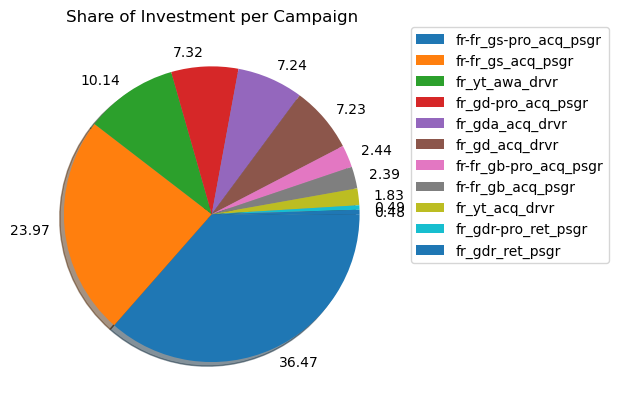

In [197]:
values = groupby_cost['share_in_percentage']
labels = groupby_cost['campaign']
colors = [] ##### To have a good color pallett
plt.pie(values, labels= values,counterclock=False, shadow=True)
plt.title('Share of Investment per Campaign')
plt.legend(labels, bbox_to_anchor=(1.02,1.025), loc='upper left')
plt.show()

### Section 2: Overall Analysis

#### 1. What are BlaBlaCar’s high seasonality periods (months)?
   
For high seasonality periods, especially as its for the marketing team, the best indicator will be the number of passengers which can show us the months in which we had the highest use and basically shows us in which months people tend to travel more, using our service.

As we can see nearly 50% of our passengers did their trip during 4 months of July, May, August, and December in descending order and the other 50% is distributed within the other 8 months. Also the number of carpool passengers and bus passengers has about the same proportion through the whole year with a share of 70% for carpool passengers and 30% for bus passengers. categories.

So by having the 50% of the passengers in four month we can think about the reasons which can be dependent on various factors related to holidays, weather and cultural events:

- **July and August**: Can relate to summer holidays, school holidays, and time for vacations.
- **May**: Can be due to multiple bank holidays in France while its spring travel time.
- **December**: Can be related to Chritsmas and new year holidays, family reunions, and winter breaks.

If we want to have a wider view, as shown in the graph, we can divide the months in terms of seasonality periods, into 4 categories of low, moderate, and high, and based on our data we can have another category as super high as the gap is higher than the others:

- **Low Seasonality** : March, April, January, October, February
- **Moderate Seasonality** : June, September, November
- **High Seasonality** : May, August, December
- **Super High Seasonlity**: July

For July we can assume that it is right after the end school in June, (I can search for it)

In [214]:
number_of_pax_per_month = attribution.groupby(['month'])[["carpool_pax", "bus_pax"]].sum().reset_index()
number_of_pax_per_month['total_pax'] = number_of_pax_per_month['carpool_pax'] + number_of_pax_per_month['bus_pax']

# Changing the month column for plots, removing the day from it
number_of_pax_per_month['month'] = number_of_pax_per_month['month'].str[:7]

number_of_pax_per_month.sort_values(by = 'total_pax', ascending = False)

,month,carpool_pax,bus_pax,total_pax
1,2022-07,91616.0,37715.0,129331.0
11,2023-05,75924.0,31111.0,107035.0
2,2022-08,75409.0,30380.0,105789.0
6,2022-12,73694.0,30192.0,103886.0
0,2022-06,60468.0,24592.0,85060.0
3,2022-09,60171.0,24473.0,84644.0
5,2022-11,59291.0,23868.0,83159.0
9,2023-03,30741.0,12581.0,43322.0
10,2023-04,30283.0,12425.0,42708.0
7,2023-01,30361.0,12211.0,42572.0


In [215]:
#getting all_pax shares per month:
sum_total_pax = number_of_pax_per_month['total_pax'].sum()
all_pax_percentage = (number_of_pax_per_month['total_pax'] / sum_total_pax) * 100
number_of_pax_per_month['total_pax_share_in_percentage'] = all_pax_percentage

# Getting the share of carpool and bus passengers:
percentage_carpool = (number_of_pax_per_month['carpool_pax'] / number_of_pax_per_month['total_pax']) * 100
percentage_bus = (number_of_pax_per_month['bus_pax'] / number_of_pax_per_month['total_pax']) * 100
number_of_pax_per_month['carpool_share_in_percentage'] = percentage_carpool
number_of_pax_per_month['bus_share_in_percentage'] = percentage_bus

# Final table
number_of_pax_per_month_with_all_shares = number_of_pax_per_month[['month', 'total_pax', 'total_pax_share_in_percentage', 'carpool_share_in_percentage', 'bus_share_in_percentage']]
number_of_pax_per_month_with_all_shares = number_of_pax_per_month_with_all_shares.round({'total_pax_share_in_percentage':2, 'carpool_share_in_percentage':2, 'bus_share_in_percentage':2})
number_of_pax_per_month_with_all_shares.sort_values(by = 'total_pax', ascending = False)

,month,total_pax,total_pax_share_in_percentage,carpool_share_in_percentage,bus_share_in_percentage
1,2022-07,129331.0,14.20,70.84,29.16
11,2023-05,107035.0,11.75,70.93,29.07
2,2022-08,105789.0,11.61,71.28,28.72
6,2022-12,103886.0,11.40,70.94,29.06
0,2022-06,85060.0,9.34,71.09,28.91
3,2022-09,84644.0,9.29,71.09,28.91
5,2022-11,83159.0,9.13,71.30,28.70
9,2023-03,43322.0,4.76,70.96,29.04
10,2023-04,42708.0,4.69,70.91,29.09
7,2023-01,42572.0,4.67,71.32,28.68


C:\Users\yasam\anaconda31\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yasam\anaconda31\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yasam\anaconda31\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


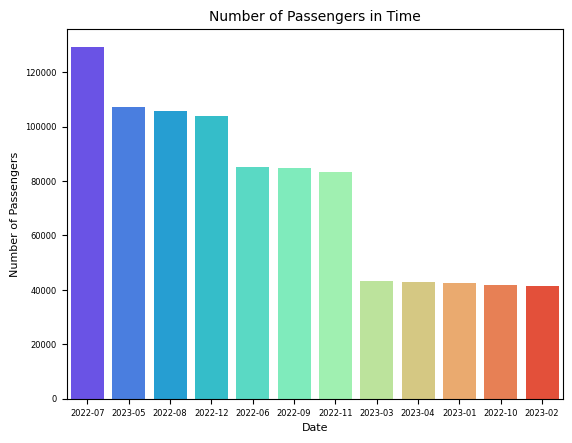

In [391]:
## Showing the number of passengers in time
total_pax_graph = sns.barplot(x='month', y= 'total_pax', data= number_of_pax_per_month_with_all_shares.sort_values(by = 'total_pax', ascending = False), palette='rainbow')
total_pax_graph.axes.set_title("Number of Passengers in Time",fontsize=10)
total_pax_graph.set_xlabel("Date",fontsize=8)
total_pax_graph.set_ylabel("Number of Passengers",fontsize=8)
total_pax_graph.tick_params(labelsize=6)
plt.show()

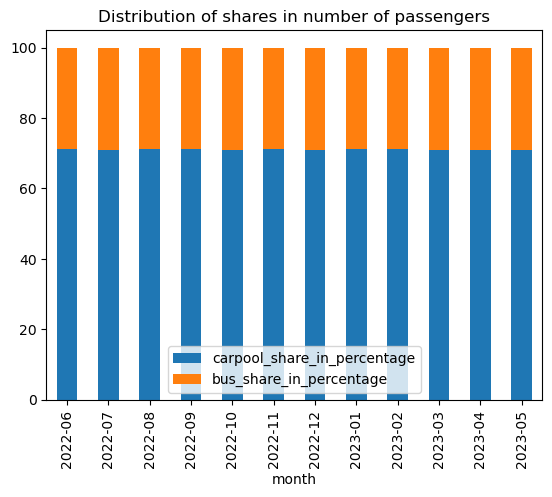

In [298]:
total_pax_carpool_bus_plot = number_of_pax_per_month_with_all_shares[['month', 'carpool_share_in_percentage', 'bus_share_in_percentage']]
ax = total_pax_carpool_bus_plot.plot.bar(x='month', stacked=True, title='Distribution of shares in number of passengers')

#### 2. What are the most relevant metric(s) to monitor a campaign’s performance?

First of all if we can take a look at our customer journey, which begins by viewng the ad, followed by clicking, booking a trip, becoming a passenger, so doing the trip and in the driver side offering the first trip. 

So based on that, one thing that we can consider is how many people we touched thanks to the campaign (although the high number of impressions can not be an indicator of the effectivness of a campaign). Following the funnel, we can see that amongst people who were exposed to the ad, how many took the next step by clicking on the ad. And then to first booking, and doing a trip or in the driver side, offering a trip. 

For campaigns targeting passengers I would choose Profit per Impression (PPI) as a good indicator, as it takes the beginning (impressions) and ending (profit) points of the ad process, and can show us the ultimate viability of an ad campaign.

For campaigns targeting drivers, as we don't have the data specifying the number of trips each new driver had, it will be hard to determine the profit per impression, instead I would use number of new drivers per impression as an indicator. 

Looking on financial impact, we can assess the effectiveness of our campagins by calculting the return on investment ratio. 

Also mentioning that for each campaign, the metrics can vary based on the target of the campaign, like for acquisition for drivers the number of new drivers is important, while for retargeting passengers, number of passengers. 

In [392]:
# Joining the tables on campaign and date:
attribution_api = pd.merge(attribution, api, left_on = ['campaign_id', 'month'], right_on = ['campaign_id', 'month'], how = 'inner')
attribution_api = attribution_api.groupby(['campaign_id', 'campaign'])[['cost', 'carpool_revenue', 'bus_revenue', 'bookings', 'carpool_pax', 'bus_pax', 'new_driver', 'platform_clicks', 'impressions']].sum().reset_index()
attribution_api['total_revenue'] = attribution_api['carpool_revenue'] + attribution_api['bus_revenue']
attribution_api['total_pax'] = attribution_api['carpool_pax'] + attribution_api['bus_pax']
attribution_api.head()

,campaign_id,campaign,cost,carpool_revenue,bus_revenue,bookings,carpool_pax,bus_pax,new_driver,platform_clicks,impressions,total_revenue,total_pax
0,10687,fr-fr_gs-pro_acq_psgr,1615654.0,798495.0,3233478.0,491517.0,202625.0,132636.0,3764.0,4834727.0,33556056.0,4031973.0,335261.0
1,337015,fr-fr_gs_acq_psgr,1061922.0,1087333.0,2002792.0,589418.0,279404.0,80964.0,5133.0,3816738.0,22963935.0,3090125.0,360368.0
2,344756,fr-fr_gb-pro_acq_psgr,108057.0,45757.0,282108.0,31878.0,10820.0,12367.0,229.0,567620.0,948115.0,327865.0,23187.0
3,551989,fr_gdr-pro_ret_psgr,21511.0,156254.0,228440.0,85546.0,39079.0,10307.0,0.0,715094.0,75985065.0,384694.0,49386.0
4,699765,fr_yt_awa_drvr,449420.0,442.0,274.0,118.0,82.0,13.0,87.0,499424.0,182129545.0,716.0,95.0


In [434]:
total_impressions = attribution_api.groupby(['campaign'])['impressions'].sum().reset_index()
total_impressions = total_impressions.sort_values(by = 'impressions', ascending = False)
total_impressions

,campaign,impressions
6,fr_gda_acq_drvr,332423367.0
10,fr_yt_awa_drvr,182129545.0
4,fr_gd-pro_acq_psgr,82430204.0
7,fr_gdr-pro_ret_psgr,75985065.0
5,fr_gd_acq_drvr,69667966.0
2,fr-fr_gs-pro_acq_psgr,33556056.0
3,fr-fr_gs_acq_psgr,22963935.0
8,fr_gdr_ret_psgr,20716960.0
9,fr_yt_acq_drvr,14608803.0
1,fr-fr_gb_acq_psgr,1915565.0


C:\Users\yasam\anaconda31\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yasam\anaconda31\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yasam\anaconda31\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


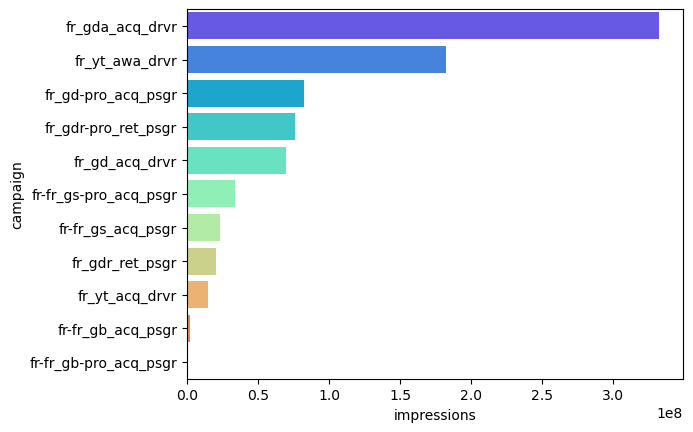

In [435]:
total_impressions_plot = sns.barplot(x='impressions', y= 'campaign', data= total_impressions, palette='rainbow')

In [428]:
# Passengers' campaigns :
    # Click per Impression Conversion Rate
    # Booking per Click Conversion Rate
    # Passenger per Booking Conversion Rate
    # Passenger per impression (the whole funnel)
    # Profit per impression

conversion_rates_pax = attribution_api[['campaign', 'impressions', 'platform_clicks', 'bookings', 'total_pax', 'total_revenue', 'cost']].copy()

conversion_rates_pax['profit'] = conversion_rates_pax['total_revenue'] -  conversion_rates_pax['cost']

conversion_rates_pax['click_per_impression'] = (conversion_rates_pax['platform_clicks'] / conversion_rates_pax['impressions'])
conversion_rates_pax['booking_per_click'] = (conversion_rates_pax['bookings'] / conversion_rates_pax['platform_clicks'])
conversion_rates_pax['passenger_per_booking'] = (conversion_rates_pax['total_pax'] / conversion_rates_pax['bookings'])
conversion_rates_pax['passenger_per_hundred_impressions'] = (conversion_rates_pax['total_pax'] / conversion_rates_pax['impressions']) * 100

conversion_rates_pax['profit_per_impression'] = (conversion_rates_pax['profit'] / conversion_rates_pax['impressions'])

conversion_rates_pax.sort_values(by = 'profit_per_impression', ascending = False)

,campaign,impressions,platform_clicks,bookings,total_pax,total_revenue,cost,profit,click_per_impression,booking_per_click,passenger_per_booking,passenger_per_hundred_impressions,profit_per_impression
2,fr-fr_gb-pro_acq_psgr,948115.0,567620.0,31878.0,23187.0,327865.0,108057.00,219808.00,0.598683,0.056161,0.727367,2.445589,0.231837
6,fr-fr_gb_acq_psgr,1915565.0,1335099.0,77288.0,46928.0,354566.0,106029.00,248537.00,0.696974,0.057889,0.607184,2.449826,0.129746
1,fr-fr_gs_acq_psgr,22963935.0,3816738.0,589418.0,360368.0,3090125.0,1061922.00,2028203.00,0.166206,0.154430,0.611396,1.569278,0.088321
0,fr-fr_gs-pro_acq_psgr,33556056.0,4834727.0,491517.0,335261.0,4031973.0,1615654.00,2416319.00,0.144079,0.101664,0.682094,0.999107,0.072008
3,fr_gdr-pro_ret_psgr,75985065.0,715094.0,85546.0,49386.0,384694.0,21511.00,363183.00,0.009411,0.119629,0.577303,0.064994,0.004780
10,fr_gdr_ret_psgr,20716960.0,224990.0,18560.0,10990.0,84535.0,21292.00,63243.00,0.010860,0.082493,0.592134,0.053048,0.003053
7,fr_gda_acq_drvr,332423367.0,1122104.0,78677.0,47517.0,336005.0,320761.00,15244.00,0.003376,0.070116,0.603950,0.014294,0.000046
5,fr_gd-pro_acq_psgr,82430204.0,2767763.0,36385.0,20644.0,138861.0,324241.00,-185380.00,0.033577,0.013146,0.567377,0.025044,-0.002249
4,fr_yt_awa_drvr,182129545.0,499424.0,118.0,95.0,716.0,449420.00,-448704.00,0.002742,0.000236,0.805085,0.000052,-0.002464
8,fr_yt_acq_drvr,14608803.0,112524.0,16805.0,4278.0,34083.0,80905.08,-46822.08,0.007702,0.149346,0.254567,0.029284,-0.003205


In [422]:
mean_pax = conversion_rates_pax[['click_per_impression', 'booking_per_click', 'passenger_per_booking', 'passenger_per_hundred_impressions', 'profit_per_impression']].mean()
mean_pax

click_per_impression                 0.158612
booking_per_click                    0.073569
passenger_per_booking                0.602205
passenger_per_hundred_impressions    0.697098
profit_per_impression                0.047138
dtype: float64

In [418]:
# Drivers' campaigns :
    # Click per Impression Conversion Rate
    # New driver per click
    # New driver per impression (whole funnel)

conversion_rates_drvr = attribution_api[['campaign', 'impressions', 'platform_clicks', 'new_driver']].copy()
conversion_rates_drvr['click_per_impression'] = (conversion_rates_drvr['platform_clicks'] / conversion_rates_drvr['impressions'])
conversion_rates_drvr['driver_per_click'] = (conversion_rates_drvr['new_driver'] / conversion_rates_drvr['platform_clicks']) 

conversion_rates_drvr['driver_per_impression'] = (conversion_rates_drvr['new_driver'] / conversion_rates_drvr['impressions']) * 100000

conversion_rates_drvr = conversion_rates_drvr[conversion_rates_drvr['campaign'].str.contains('drvr')]
conversion_rates_drvr = conversion_rates_drvr.round({'click_per_impression' : 3, 'driver_per_click' : 3, 'driver_per_impression' : 3})
conversion_rates_drvr.sort_values(by = ['driver_per_impression'] , ascending = False)

,campaign,impressions,platform_clicks,new_driver,click_per_impression,driver_per_click,driver_per_impression
9,fr_gd_acq_drvr,69667966.0,4954682.0,863.0,0.071,0.000,1.239
7,fr_gda_acq_drvr,332423367.0,1122104.0,1394.0,0.003,0.001,0.419
8,fr_yt_acq_drvr,14608803.0,112524.0,51.0,0.008,0.000,0.349
4,fr_yt_awa_drvr,182129545.0,499424.0,87.0,0.003,0.000,0.048


In [423]:
mean_drvr = conversion_rates_drvr[['click_per_impression', 'driver_per_click', 'driver_per_impression']].mean()
mean_drvr

click_per_impression     0.02125
driver_per_click         0.00025
driver_per_impression    0.51375
dtype: float64

In [425]:
# Click can be the most important step in the process, as it shows that ad has interested the visitor, I take clicks as the basis for
conversion_rate_based_on_clicks_pax = conversion_rates_pax[['campaign', 'platform_clicks', 'bookings', 'total_pax', 'cost', 'total_revenue']].copy()

conversion_rate_based_on_clicks_pax['profit'] = conversion_rate_based_on_clicks_pax['total_revenue'] - conversion_rate_based_on_clicks_pax['cost']

conversion_rate_based_on_clicks_pax['booking_per_click'] = (conversion_rate_based_on_clicks_pax['bookings'] / conversion_rate_based_on_clicks_pax['platform_clicks']) 
conversion_rate_based_on_clicks_pax['passenger_per_click'] = (conversion_rate_based_on_clicks_pax['total_pax'] / conversion_rate_based_on_clicks_pax['platform_clicks']) 
conversion_rate_based_on_clicks_pax['profit_per_click'] = (conversion_rate_based_on_clicks_pax['profit'] / conversion_rate_based_on_clicks_pax['platform_clicks']) 

conversion_rate_based_on_clicks_pax = conversion_rate_based_on_clicks_pax[conversion_rate_based_on_clicks_pax['campaign'].str.contains('psgr')]
conversion_rate_based_on_clicks_pax.sort_values(by = ['booking_per_click', 'passenger_per_click', 'profit_per_click'] , ascending = False)

,campaign,platform_clicks,bookings,total_pax,cost,total_revenue,profit,booking_per_click,passenger_per_click,profit_per_click
1,fr-fr_gs_acq_psgr,3816738.0,589418.0,360368.0,1061922.0,3090125.0,2028203.0,0.154430,0.094418,0.531397
3,fr_gdr-pro_ret_psgr,715094.0,85546.0,49386.0,21511.0,384694.0,363183.0,0.119629,0.069062,0.507881
0,fr-fr_gs-pro_acq_psgr,4834727.0,491517.0,335261.0,1615654.0,4031973.0,2416319.0,0.101664,0.069344,0.499784
10,fr_gdr_ret_psgr,224990.0,18560.0,10990.0,21292.0,84535.0,63243.0,0.082493,0.048847,0.281092
6,fr-fr_gb_acq_psgr,1335099.0,77288.0,46928.0,106029.0,354566.0,248537.0,0.057889,0.035149,0.186156
2,fr-fr_gb-pro_acq_psgr,567620.0,31878.0,23187.0,108057.0,327865.0,219808.0,0.056161,0.040850,0.387245
5,fr_gd-pro_acq_psgr,2767763.0,36385.0,20644.0,324241.0,138861.0,-185380.0,0.013146,0.007459,-0.066978


<Axes: xlabel='campaign'>

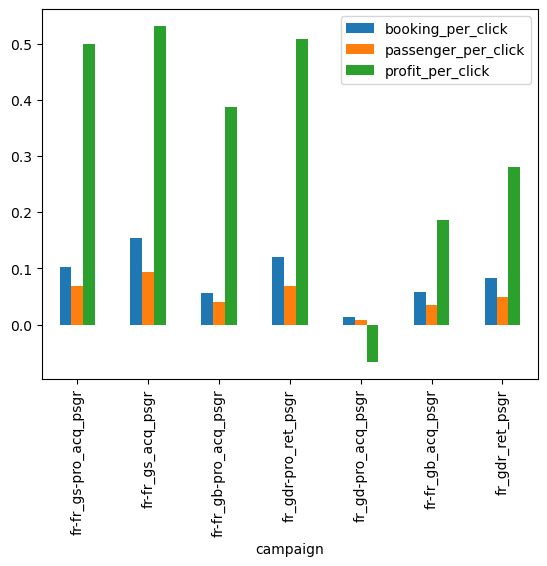

In [427]:
conversion_rate_based_on_clicks_pax_plot = conversion_rate_based_on_clicks_pax[['campaign', 'booking_per_click', 'passenger_per_click', 'profit_per_click']].copy()
conversion_rate_based_on_clicks_pax_plot.plot(x='campaign', y=['booking_per_click', 'passenger_per_click', 'profit_per_click'], kind="bar")

In [429]:
# Financial impact
revenue_cost_roi = attribution_api[['campaign', 'cost', 'total_revenue']].copy()
revenue_cost_roi['profit'] = revenue_cost_roi['total_revenue'] - revenue_cost_roi['cost']
revenue_cost_roi['revenue_generated_by_one_euro_spent'] = revenue_cost_roi['total_revenue'] / revenue_cost_roi['cost']
revenue_cost_roi['net_income'] = (revenue_cost_roi['total_revenue'] - revenue_cost_roi['cost']) / revenue_cost_roi['cost'] 
revenue_cost_roi = revenue_cost_roi.round({'revenue_generated_by_one_euro_spent' : 2, 'net_income' : 2})
revenue_cost_roi.sort_values(by = 'net_income', ascending = False)

,campaign,cost,total_revenue,profit,revenue_generated_by_one_euro_spent,net_income
3,fr_gdr-pro_ret_psgr,21511.00,384694.0,363183.00,17.88,16.88
10,fr_gdr_ret_psgr,21292.00,84535.0,63243.00,3.97,2.97
6,fr-fr_gb_acq_psgr,106029.00,354566.0,248537.00,3.34,2.34
2,fr-fr_gb-pro_acq_psgr,108057.00,327865.0,219808.00,3.03,2.03
1,fr-fr_gs_acq_psgr,1061922.00,3090125.0,2028203.00,2.91,1.91
0,fr-fr_gs-pro_acq_psgr,1615654.00,4031973.0,2416319.00,2.50,1.50
7,fr_gda_acq_drvr,320761.00,336005.0,15244.00,1.05,0.05
5,fr_gd-pro_acq_psgr,324241.00,138861.0,-185380.00,0.43,-0.57
8,fr_yt_acq_drvr,80905.08,34083.0,-46822.08,0.42,-0.58
9,fr_gd_acq_drvr,320215.00,86336.0,-233879.00,0.27,-0.73


<Axes: xlabel='campaign'>

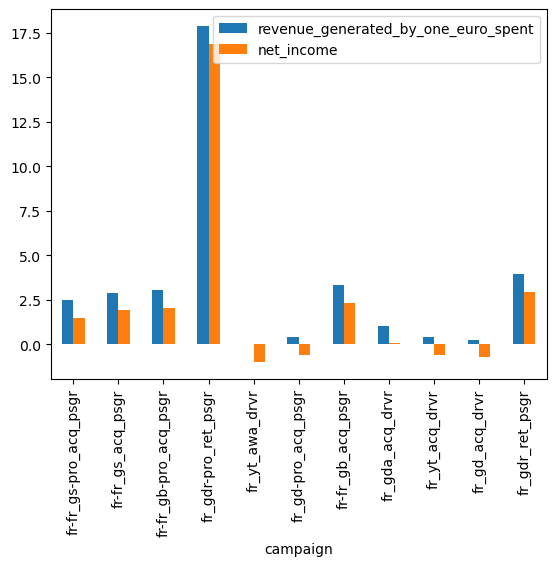

In [426]:
revenue_cost_roi = revenue_cost_roi[['campaign', 'revenue_generated_by_one_euro_spent', 'net_income']].copy()
revenue_cost_roi.plot(x="campaign", y=["revenue_generated_by_one_euro_spent", "net_income"], kind="bar")
# for presentation i can blur the passenger ones to see the driver oriented metrics, and then the same for passenger oriented

### Third Question
#### 3. In your opinion, which is the most performant campaign? Why?


## Section 3

#### Evaluate “fr_yt_acq_drvr” campaign performances.
#### Evaluate “fr_yt_awa_drvr” campaign performances.

First we join the two tables for this campaign and gather some information and insights to see how it has worked.

In [445]:
attribution_api_yt_acq_drvr = pd.merge(attribution, api, left_on = ['campaign_id', 'month'], right_on = ['campaign_id', 'month'], how = 'inner')
attribution_api_yt_acq_drvr['total_revenue'] = attribution_api_yt_acq_drvr['carpool_revenue'] + attribution_api_yt_acq_drvr['bus_revenue']
attribution_api_yt_acq_drvr['total_pax'] = attribution_api_yt_acq_drvr['carpool_pax'] + attribution_api_yt_acq_drvr['bus_pax']
attribution_api_yt_acq_drvr = attribution_api_yt_acq_drvr.loc[(attribution_api_yt_acq_drvr['campaign'] == 'fr_yt_acq_drvr') | (attribution_api_yt_acq_drvr['campaign'] == 'fr_yt_awa_drvr')]
attribution_api_yt_acq_drvr =  attribution_api_yt_acq_drvr.loc[attribution_api_yt_acq_drvr['cost'] != 0]
attribution_api_yt_acq_drvr

,campaign_id,month,bookings,carpool_pax,carpool_revenue,bus_revenue,bus_pax,new_driver,campaign,cost,platform_clicks,impressions,total_revenue,total_pax
24,699765,2023-04-01,35.0,24.0,129.0,84.0,4.0,25.0,fr_yt_awa_drvr,130245.00,125829.0,55928422.0,213.0,28.0
48,839921,2022-06-01,3952.0,940.0,4539.0,5392.0,348.0,12.0,fr_yt_acq_drvr,25670.86,34222.0,5398522.0,9931.0,1288.0
59,699765,2023-05-01,55.0,43.0,227.0,140.0,7.0,39.0,fr_yt_awa_drvr,199845.00,259329.0,73040248.0,367.0,50.0
66,839921,2022-07-01,12853.0,2100.0,9220.0,14932.0,890.0,39.0,fr_yt_acq_drvr,55234.22,78302.0,9210281.0,24152.0,2990.0
77,699765,2022-07-01,23.0,13.0,66.0,50.0,2.0,18.0,fr_yt_awa_drvr,94028.00,88428.0,40284952.0,116.0,15.0
92,699765,2022-06-01,5.0,2.0,20.0,0.0,0.0,5.0,fr_yt_awa_drvr,25302.00,25838.0,12875923.0,20.0,2.0


In [452]:
# Drivers' campaigns :
    # Click per Impression Conversion Rate
    # New driver per click
    # New driver per impression (whole funnel)

conversion_rates_drvr_acq = attribution_api_yt_acq_drvr[['campaign', 'impressions', 'platform_clicks', 'new_driver']].copy()
conversion_rates_drvr_acq = conversion_rates_drvr_acq.groupby('campaign').sum().reset_index()
conversion_rates_drvr_acq['click_per_impression'] = (conversion_rates_drvr_acq['platform_clicks'] / conversion_rates_drvr_acq['impressions'])
conversion_rates_drvr_acq['driver_per_click'] = (conversion_rates_drvr_acq['new_driver'] / conversion_rates_drvr_acq['platform_clicks']) * 1000

conversion_rates_drvr_acq['driver_per_impression'] = (conversion_rates_drvr_acq['new_driver'] / conversion_rates_drvr_acq['impressions']) * 1000

conversion_rates_drvr_acq = conversion_rates_drvr_acq.round({'click_per_impression' : 3, 'driver_per_click' : 3, 'driver_per_impression' : 3})
conversion_rates_drvr_acq.sort_values(by = ['driver_per_impression'] , ascending = False)

,campaign,impressions,platform_clicks,new_driver,click_per_impression,driver_per_click,driver_per_impression
0,fr_yt_acq_drvr,14608803.0,112524.0,51.0,0.008,0.453,0.003
1,fr_yt_awa_drvr,182129545.0,499424.0,87.0,0.003,0.174,0.000


#### Financial Side

In [455]:
revenue_cost_roi_drvr = attribution_api_yt_acq_drvr[['campaign', 'cost', 'total_revenue']].copy()
revenue_cost_roi_drvr = revenue_cost_roi_drvr.groupby('campaign').sum().reset_index()
revenue_cost_roi_drvr['profit'] = revenue_cost_roi_drvr['total_revenue'] - revenue_cost_roi_drvr['cost']
revenue_cost_roi_drvr['revenue_generated_by_one_euro_spent'] = revenue_cost_roi_drvr['total_revenue'] / revenue_cost_roi_drvr['cost']
revenue_cost_roi_drvr['net_income'] = (revenue_cost_roi_drvr['total_revenue'] - revenue_cost_roi_drvr['cost']) / revenue_cost_roi_drvr['cost'] 
revenue_cost_roi_drvr = revenue_cost_roi_drvr.round({'revenue_generated_by_one_euro_spent' : 2, 'net_income' : 2})
revenue_cost_roi_drvr.sort_values(by = 'net_income', ascending = False)

,campaign,cost,total_revenue,profit,revenue_generated_by_one_euro_spent,net_income
0,fr_yt_acq_drvr,80905.08,34083.0,-46822.08,0.42,-0.58
1,fr_yt_awa_drvr,449420.00,716.0,-448704.00,0.00,-1.00


In [274]:
conversion_rates_acq_drvr = attribution_api_yt_acq_drvr[['campaign', 'month', 'impressions', 'platform_clicks', 'new_driver']].copy()
conversion_rates_acq_drvr['driver_per_hundred_impression_in_percentage'] = (conversion_rates_acq_drvr['new_driver'] / conversion_rates_acq_drvr['impressions']) * 100
conversion_rates_acq_drvr['driver_per_hundred_click_in_percentage'] = (conversion_rates_acq_drvr['new_driver'] / conversion_rates_acq_drvr['platform_clicks']) * 100

conversion_rates_acq_drvr = conversion_rates_acq_drvr.round({'driver_per_hundred_impression_in_percentage' : 2, 'driver_per_hundred_click_in_percentage' : 2})
conversion_rates_acq_drvr.sort_values(by = 'month', ascending = True)

,campaign,month,impressions,platform_clicks,new_driver,driver_per_hundred_impression_in_percentage,driver_per_hundred_click_in_percentage
48,fr_yt_acq_drvr,2022-06-01,5398522.0,34222.0,12.0,0.0,0.04
66,fr_yt_acq_drvr,2022-07-01,9210281.0,78302.0,39.0,0.0,0.05


#### In June/July 2022 marketing teams tried an acquisition Youtube campaign (“fr_yt_acq_drvr”) but they did not reiterate unlike the other Youtube campaign (“fr_yt_awa_drvr”). Explain why?

As we can see from the graphs below, the one that is targeted for acquiring new drivers performed less in terms of attracting new drivers than the one that was targetted to raise awarness of the brand for drivers.

And they are perfroming at the same time, and as the awarness campaign is covering the acquisition as well, so better to just run this campaign for this time of year. 

Also looking at the months in which each campaign had new drivers, the acqusition campaign just perforemed during the period of campaign, while for the awarness campaign it has performed on the campain period but also in two other months (2 months before the start of campaign in the following year). 

In [350]:
# zero values
attribution_api_yt_acq_awa_drvr = pd.merge(attribution, api, left_on = ['campaign_id', 'month'], right_on = ['campaign_id', 'month'], how = 'inner')
attribution_api_yt_acq_awa_drvr['total_revenue'] = attribution_api_yt_acq_awa_drvr['carpool_revenue'] + attribution_api_yt_acq_awa_drvr['bus_revenue']
attribution_api_yt_acq_awa_drvr = attribution_api_yt_acq_awa_drvr.loc[(attribution_api_yt_acq_awa_drvr['campaign'] == 'fr_yt_acq_drvr') | (attribution_api_yt_acq_awa_drvr['campaign'] == 'fr_yt_awa_drvr')]
attribution_api_yt_acq_awa_drvr

,campaign_id,month,bookings,carpool_pax,carpool_revenue,bus_revenue,bus_pax,new_driver,campaign,cost,platform_clicks,impressions,total_revenue
9,699765,2022-12-01,0.0,0.0,0.0,0.0,0.0,0.0,fr_yt_awa_drvr,0.00,0.0,0.0,0.0
15,839921,2023-02-01,0.0,0.0,0.0,0.0,0.0,0.0,fr_yt_acq_drvr,0.00,0.0,0.0,0.0
16,699765,2023-03-01,0.0,0.0,0.0,0.0,0.0,0.0,fr_yt_awa_drvr,0.00,0.0,0.0,0.0
24,699765,2023-04-01,35.0,24.0,129.0,84.0,4.0,25.0,fr_yt_awa_drvr,130245.00,125829.0,55928422.0,213.0
27,699765,2022-09-01,0.0,0.0,0.0,0.0,0.0,0.0,fr_yt_awa_drvr,0.00,0.0,0.0,0.0
28,699765,2023-02-01,0.0,0.0,0.0,0.0,0.0,0.0,fr_yt_awa_drvr,0.00,0.0,0.0,0.0
31,839921,2023-01-01,0.0,0.0,0.0,0.0,0.0,0.0,fr_yt_acq_drvr,0.00,0.0,0.0,0.0
35,839921,2022-12-01,0.0,0.0,0.0,0.0,0.0,0.0,fr_yt_acq_drvr,0.00,0.0,0.0,0.0
37,699765,2023-01-01,0.0,0.0,0.0,0.0,0.0,0.0,fr_yt_awa_drvr,0.00,0.0,0.0,0.0
43,699765,2022-11-01,0.0,0.0,0.0,0.0,0.0,0.0,fr_yt_awa_drvr,0.00,0.0,0.0,0.0


<Axes: xlabel='month'>

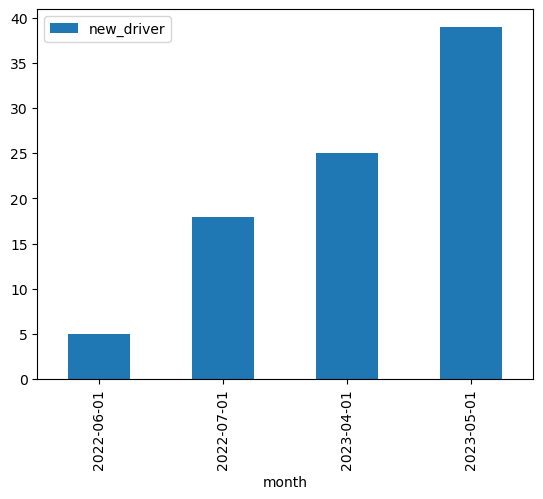

In [362]:
attribution_api_yt_awa_drvr_plot = attribution_api_yt_awa_drvr[['campaign', 'month', 'new_driver']].copy()
attribution_api_yt_awa_drvr_plot = attribution_api_yt_awa_drvr_plot.loc[attribution_api_yt_awa_drvr_plot['campaign'] == 'fr_yt_awa_drvr'].sort_values(by = 'month')
attribution_api_yt_awa_drvr_plot.plot(x="month", y='new_driver', kind="bar")

<Axes: xlabel='month'>

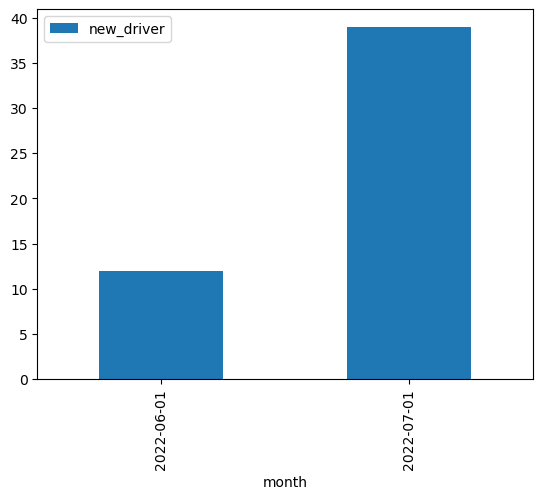

In [363]:
attribution_api_yt_acq_drvr_plot = attribution_api_yt_acq_drvr[['campaign', 'month', 'new_driver']].copy()
attribution_api_yt_acq_drvr_plot = attribution_api_yt_acq_drvr_plot.loc[attribution_api_yt_acq_drvr_plot['campaign'] == 'fr_yt_acq_drvr'].sort_values(by = 'month')
attribution_api_yt_acq_drvr_plot.plot(x="month", y='new_driver', kind="bar")

In [353]:
attribution_zero_values_plot = attribution_api_yt_acq_awa_drvr.loc[attribution_api_yt_acq_awa_drvr['new_driver'] == 0]
attribution_zero_values_plot.head()

,campaign_id,month,bookings,carpool_pax,carpool_revenue,bus_revenue,bus_pax,new_driver,campaign,cost,platform_clicks,impressions,total_revenue
9,699765,2022-12-01,0.0,0.0,0.0,0.0,0.0,0.0,fr_yt_awa_drvr,0.0,0.0,0.0,0.0
15,839921,2023-02-01,0.0,0.0,0.0,0.0,0.0,0.0,fr_yt_acq_drvr,0.0,0.0,0.0,0.0
16,699765,2023-03-01,0.0,0.0,0.0,0.0,0.0,0.0,fr_yt_awa_drvr,0.0,0.0,0.0,0.0
27,699765,2022-09-01,0.0,0.0,0.0,0.0,0.0,0.0,fr_yt_awa_drvr,0.0,0.0,0.0,0.0
28,699765,2023-02-01,0.0,0.0,0.0,0.0,0.0,0.0,fr_yt_awa_drvr,0.0,0.0,0.0,0.0


C:\Users\yasam\anaconda31\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yasam\anaconda31\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yasam\anaconda31\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='campaign', ylabel='count'>

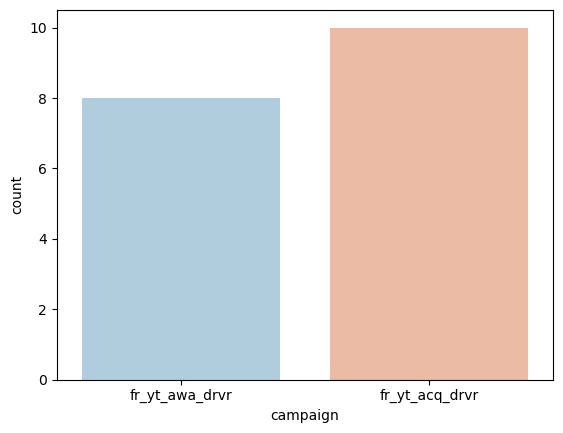

In [352]:
sns.countplot(x='campaign', data=attribution_zero_values_plot, palette='RdBu_r') 

In [456]:
# Total number of drivers acquired
groupby_campaign_drvr = attribution_api_yt_acq_awa_drvr.groupby(['campaign'])[['new_driver', 'cost', 'platform_clicks', 'total_revenue']].sum().reset_index()
groupby_campaign_drvr['cost_per_drvr'] = groupby_campaign_drvr['cost'] / groupby_campaign_drvr['new_driver']
groupby_campaign_drvr['cost_per_drvr'] = groupby_campaign_drvr['cost'] / groupby_campaign_drvr['new_driver']
groupby_campaign_drvr

,campaign,new_driver,cost,platform_clicks,total_revenue,cost_per_drvr
0,fr_yt_acq_drvr,51.0,80905.08,112524.0,34083.0,1586.374118
1,fr_yt_awa_drvr,87.0,449420.00,499424.0,716.0,5165.747126


## ROI

In [98]:
attribution_api_roi = pd.merge(attribution, api, left_on = ['campaign_id', 'month'], right_on = ['campaign_id', 'month'], how = 'inner')
attribution_api_roi = attribution_api.groupby(['campaign_id', 'campaign'])[['cost', 'carpool_revenue', 'bus_revenue']].sum().reset_index()
attribution_api_roi['total_revenue'] = attribution_api_roi['carpool_revenue'] + attribution_api_roi['bus_revenue']
attribution_api_roi['roi'] = (attribution_api_roi['total_revenue'] - attribution_api_roi['cost']) / attribution_api_roi['cost'] * 100
attribution_api_roi = attribution_api_roi.round({'roi' : 2})
attribution_api_roi.sort_values(by = 'roi', ascending = False)

,campaign_id,campaign,cost,carpool_revenue,bus_revenue,total_revenue,roi
3,551989,fr_gdr-pro_ret_psgr,21511.00,156254.0,228440.0,384694.0,1688.36
10,959975,fr_gdr_ret_psgr,21292.00,35828.0,48707.0,84535.0,297.03
6,730339,fr-fr_gb_acq_psgr,106029.00,136702.0,217864.0,354566.0,234.40
2,344756,fr-fr_gb-pro_acq_psgr,108057.00,45757.0,282108.0,327865.0,203.42
1,337015,fr-fr_gs_acq_psgr,1061922.00,1087333.0,2002792.0,3090125.0,190.99
0,10687,fr-fr_gs-pro_acq_psgr,1615654.00,798495.0,3233478.0,4031973.0,149.56
7,813363,fr_gda_acq_drvr,320761.00,146235.0,189770.0,336005.0,4.75
5,725794,fr_gd-pro_acq_psgr,324241.00,68981.0,69880.0,138861.0,-57.17
8,839921,fr_yt_acq_drvr,80905.08,13759.0,20324.0,34083.0,-57.87
9,886143,fr_gd_acq_drvr,320215.00,42894.0,43442.0,86336.0,-73.04


Assumption: ROI seems to be directly related to the campaign performance for passenger related campaign, but for drivers campaigns it doesnt relate directly but we assume that the new drivers were having more than the first trip and so in-directly have some effects on ROI, but to determine how much it affects it would not be possible with the data we have.

Results : 
Bus and Carpool Passenger Retargeting Campaigns:
These campaigns could be highly targeted and optimized. The ads may be compelling and effectively encouraging conversions, resulting in the high ROIs.

YouTube Awareness Campaign for Drivers:
With assuming that drivers had good share in revenue, the negative ROI suggests that the YouTube campaign might not be effectively reaching or engaging the intended audience (drivers). The targeting could be off, the message might not be resonating, or the cost of advertising on YouTube may outweigh the benefits in terms of new drivers or trips generated.